In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
df=pd.read_pickle('data/paths.pkl.xz')

c:\users\נעמי פינדרוס\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


Populating the interactive namespace from numpy and matplotlib


In [2]:

def draw_path(to_draw):
    img=imread("paths0.png")
    imshow(img)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    for t in to_draw.index:
        oo = df_by_obj.loc[t]
        plot(oo.x, oo.y)
  

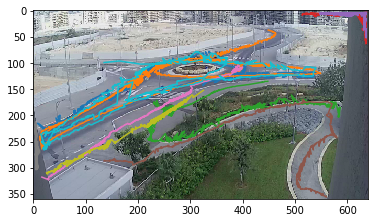

In [3]:

objs = df.groupby(["filename", "obj"]).size().sort_values(ascending=False)
top10 = objs.head(10)
draw_path(top10)

In [10]:
def filter_by_date_time(date,begin,end):
    objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})

    date =pd.to_datetime(date)
    begin_time =date+ pd.to_timedelta(begin)
    end_time =date+pd.to_timedelta(end)

    # print(date,begin_time,end_time)
#     print(objs) 
    min=objs[('time','min')]
    max=objs[('time','max')]
#     print(min.dt.date)
    items=objs[(min.between(begin_time,end_time)) | ((min.where(min<begin_time)&(max.where(max>begin_time))))]
    print(items)
    draw_path(items)


                                                               time  \
                                                                min   
filename                                    obj                       
0041952_100.h264.txt                        7   2017-08-20 04:24:11   
                                            8   2017-08-20 04:24:11   
                                            9   2017-08-20 04:24:11   
                                            10  2017-08-20 04:24:11   
                                            11  2017-08-20 04:24:11   
                                            12  2017-08-20 04:24:11   
                                            13  2017-08-20 04:24:12   
14-16\20170820040439_100.h264.txt           0   2017-08-20 04:04:39   
                                            1   2017-08-20 04:04:39   
                                            2   2017-08-20 04:04:39   
                                            3   2017-08-20 04:04:39   
      

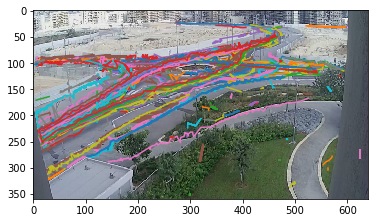

In [12]:
filter_by_date_time("2017-08-20","04:00:02","09:20:20")

In [6]:
def filter_by_time(begin,end):
    objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})

    begin_time =pd.to_datetime(begin).time()
    end_time =pd.to_datetime(end).time()

    # print(date,begin_time,end_time)
#     print(objs) 
    min=objs.time['min'].dt.time#objs[('time','min')]
    max=objs.time['max'].dt.time#objs[('time','max')]
    print(min,max)
    items=objs[(min.between(begin_time,end_time)) | ((min<begin_time)&(max>begin_time))]
    print(items)
    draw_path(items)

In [7]:
# filter_by_time("04:00:02","09:03:02")

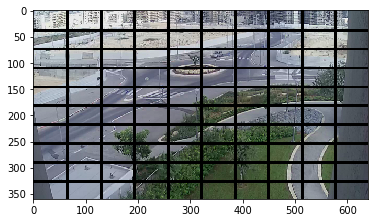

In [23]:
  
def draw_grid():
 
    img = imread("paths0.png")
    h,w=img.shape[:2]
    dx=w//10
    dy=h//10
    for i in range(dy, h, dy):
        img[i:i + 5, :] = 0
    for i in range(dx, w, dx):
        img[:, i:i + 5] = 0
    plt.imshow(img)
#     plt.close()
draw_grid()

